In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dexplot as dxp


red = ff0000
grey = cccccc
black = 333333

In [4]:
#read in the list of videos contained in the csv
df = pd.read_pickle('prepared.pkl')

## Combining the countries top 25 lists and control for duplicates. 
* This way we can classify what videos have been a top 25 video 


In [41]:
df.drop(columns='description').to_csv('combined_csv.csv')

In [20]:
df[df.duplicated(['video_id']) ==True]

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,...,num_of_tags,word_bank,cleaned_tags,cleaned_desc,title_in_description,title_in_tags,pct_tags_in_description,title_lengths,desc_lengths,tags_length
243,c6ASQOwKkhk,진 (Jin) 'The Astronaut' Official MV,2022-10-28 04:00:01+00:00,HYBE LABELS,Music,2022-11-02 00:00:00+00:00,HYBE HYBE LABELS 하이브 하이브레이블즈,32086531,4383754,506780,...,4,"[진, Jin, Astronaut, ', Official, MVCredits, ,...","{하이브레이블즈, HYBE HYBE, HYBE, LABELS, 하이브}","{Peter ByunDrone, JANG, Artist, Daniel, Kim3D,...",0,0,0.000000,35,2816,28
245,FqmYc62HUec,진 (Jin) 'The Astronaut' (with Coldplay) @ Cold...,2022-10-29 06:00:10+00:00,BANGTANTV,Music,2022-11-02 00:00:00+00:00,방탄소년단 BTS BANGTAN 알엠 RM 슈가 SUGA 제이홉 jhope 지민 정...,9744245,1260803,55741,...,18,"[진, Jin, Astronaut, with, Coldplay, @, Coldpla...","{hope, 지민, BANGTAN, 방탄, jhope, k, RM, Jung, BT...","{in, AiresCredits, 진, Coldplay, Directed, http...",0,0,0.062500,94,585,89
304,LJD49PgX3AM,진 (Jin) 'The Astronaut' Official Teaser,2022-10-26 15:00:01+00:00,HYBE LABELS,Music,2022-11-02 00:00:00+00:00,HYBE HYBE LABELS 하이브 하이브레이블즈,5411862,1230761,54707,...,4,"[진, Jin, Astronaut, ', Official, TeaserCredits...","{하이브레이블즈, HYBE HYBE, HYBE, LABELS, 하이브}","{Ran Ro, Laura Dominguez, Manager, Peter ByunD...",0,0,0.063830,39,2387,28
330,b7QlX3yR2xs,Taylor Swift - Bejeweled (Official Music Video),2022-10-25 04:00:09+00:00,TaylorSwiftVEVO,Music,2022-11-02 00:00:00+00:00,taylor swift taylor swift bejeweled midnights ...,23255852,1357596,45827,...,16,"[Official, music, video, for, Bejeweled, by, T...","{music, challenge, official, midnights, album,...","{http://tiktok.com/@taylornationInstagram, htt...",0,0,0.000000,47,2513,269
390,b1kbLwvqugk,Taylor Swift - Anti-Hero (Official Music Video),2022-10-21 12:00:06+00:00,TaylorSwiftVEVO,Music,2022-11-02 00:00:00+00:00,taylor swift taylor swift antihero anti hero m...,45713002,2249325,68763,...,30,"[Official, music, video, for, Anti, -, Hero, b...","{in, challenge, español, 한글자막, Subtitles, Phụ,...","{sexy, covert, life, http://tiktok.com/@taylor...",1,0,0.088235,47,2874,416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9531,8Itwp2_LMr0,"Cash | Like, Share & Subscribe Team-Santosh So...",2022-10-29 18:00:03+00:00,etvteluguindia,Entertainment,2022-11-02 00:00:00+00:00,cash latest promo latest promo cash promo late...,929198,13829,193,...,20,"[cash, telugushow, #, etvwin, sumakanakala, sa...","{in, subscribe, Mallemala, 2022, suma, Sobhan,...","{Life, santhoshshoban, https://www.facebook.co...",0,0,0.714286,100,1299,386
9532,-65G3J2Ylo4,Crazy couples తో...? || Mahishivan || Tamada ...,2022-10-29 05:30:00+00:00,Mahishivan,Entertainment,2022-11-02 00:00:00+00:00,Mahishivan dyson dyson airwrap Tamada Media Ma...,459905,15560,371,...,28,"[Indulge, in, Vilvah, ’s, collection, of, orga...","{Media, shopping, vlogs, YouTube, diwali, Mahe...","{so, code, Parinayam, sTollywood, serial, n't,...",0,0,0.000000,51,971,457
9533,NyHW-zcU77Q,ഒരു കലിപ്പൻ കാന്താരി അപാരതPLUS2 KAADHALI | AME...,2022-10-28 11:30:06+00:00,Sha media,Entertainment,2022-11-02 00:00:00+00:00,ameer ameersha new Shortfilimmalayalam Malayal...,197112,15182,280,...,8,"[Download, India, 's, 1, audio, book, platform...","{Malayalam, Shortfilm, new, Trending, ameersha...","{Narayanan, 1, life, , mix, HARIRAJ, 50%...",0,0,0.000000,73,1964,90
9534,jpGofgAkQjI,rarest HONDA'S SUPERBIKE with handbrake 😱😜,2022-10-30 05:30:07+00:00,JS Films,People_Blogs,2022-11-02 00:00:00+00:00,JS Films Vlogger youtuber jaysn jasminder sing...,395480,24540,394,...,24,"[Follow, on, Instagram, https://www.instagram....","{kawasaki, Films Vlogger, vlogs, indian, desi ...",{https://www.instagram.com/simbathetruck--//--...,0,0,0.083333,42,187,255


## Engagement

In [21]:
df = df.sort_values(by='rank').drop_duplicates(['video_id']).reset_index(drop=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2053 entries, 0 to 2052
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   video_id                 2053 non-null   object             
 1   title                    2053 non-null   object             
 2   publishedAt              2053 non-null   datetime64[ns, UTC]
 3   channelTitle             2053 non-null   object             
 4   categoryId               2053 non-null   object             
 5   trending_date            2053 non-null   datetime64[ns, UTC]
 6   tags                     2053 non-null   object             
 7   view_count               2053 non-null   int64              
 8   likes                    2053 non-null   int64              
 9   comment_count            2053 non-null   int64              
 10  thumbnail_link           2053 non-null   object             
 11  comments_disabled        2053 

/opt/homebrew/anaconda3/lib/python3.9/site-packages/dexplot/_common_plot.py:156: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  self.data[name].cat.remove_unused_categories(inplace=True)


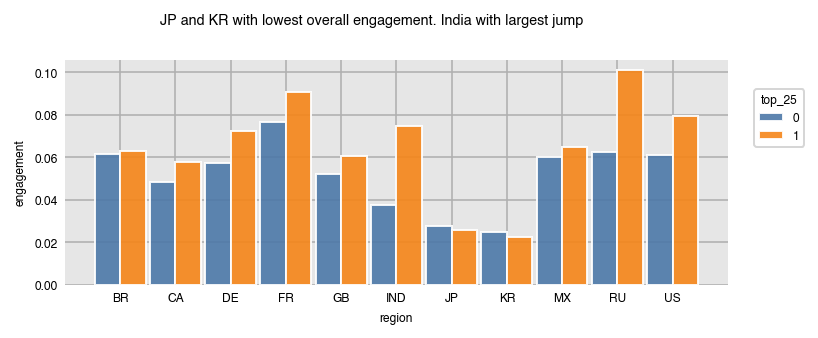

In [23]:
dxp.bar(x='region', y='engagement',split='top_25', data=df, aggfunc='median',\
     title='JP and KR with lowest overall engagement. India with largest jump')



/opt/homebrew/anaconda3/lib/python3.9/site-packages/dexplot/_common_plot.py:156: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  self.data[name].cat.remove_unused_categories(inplace=True)


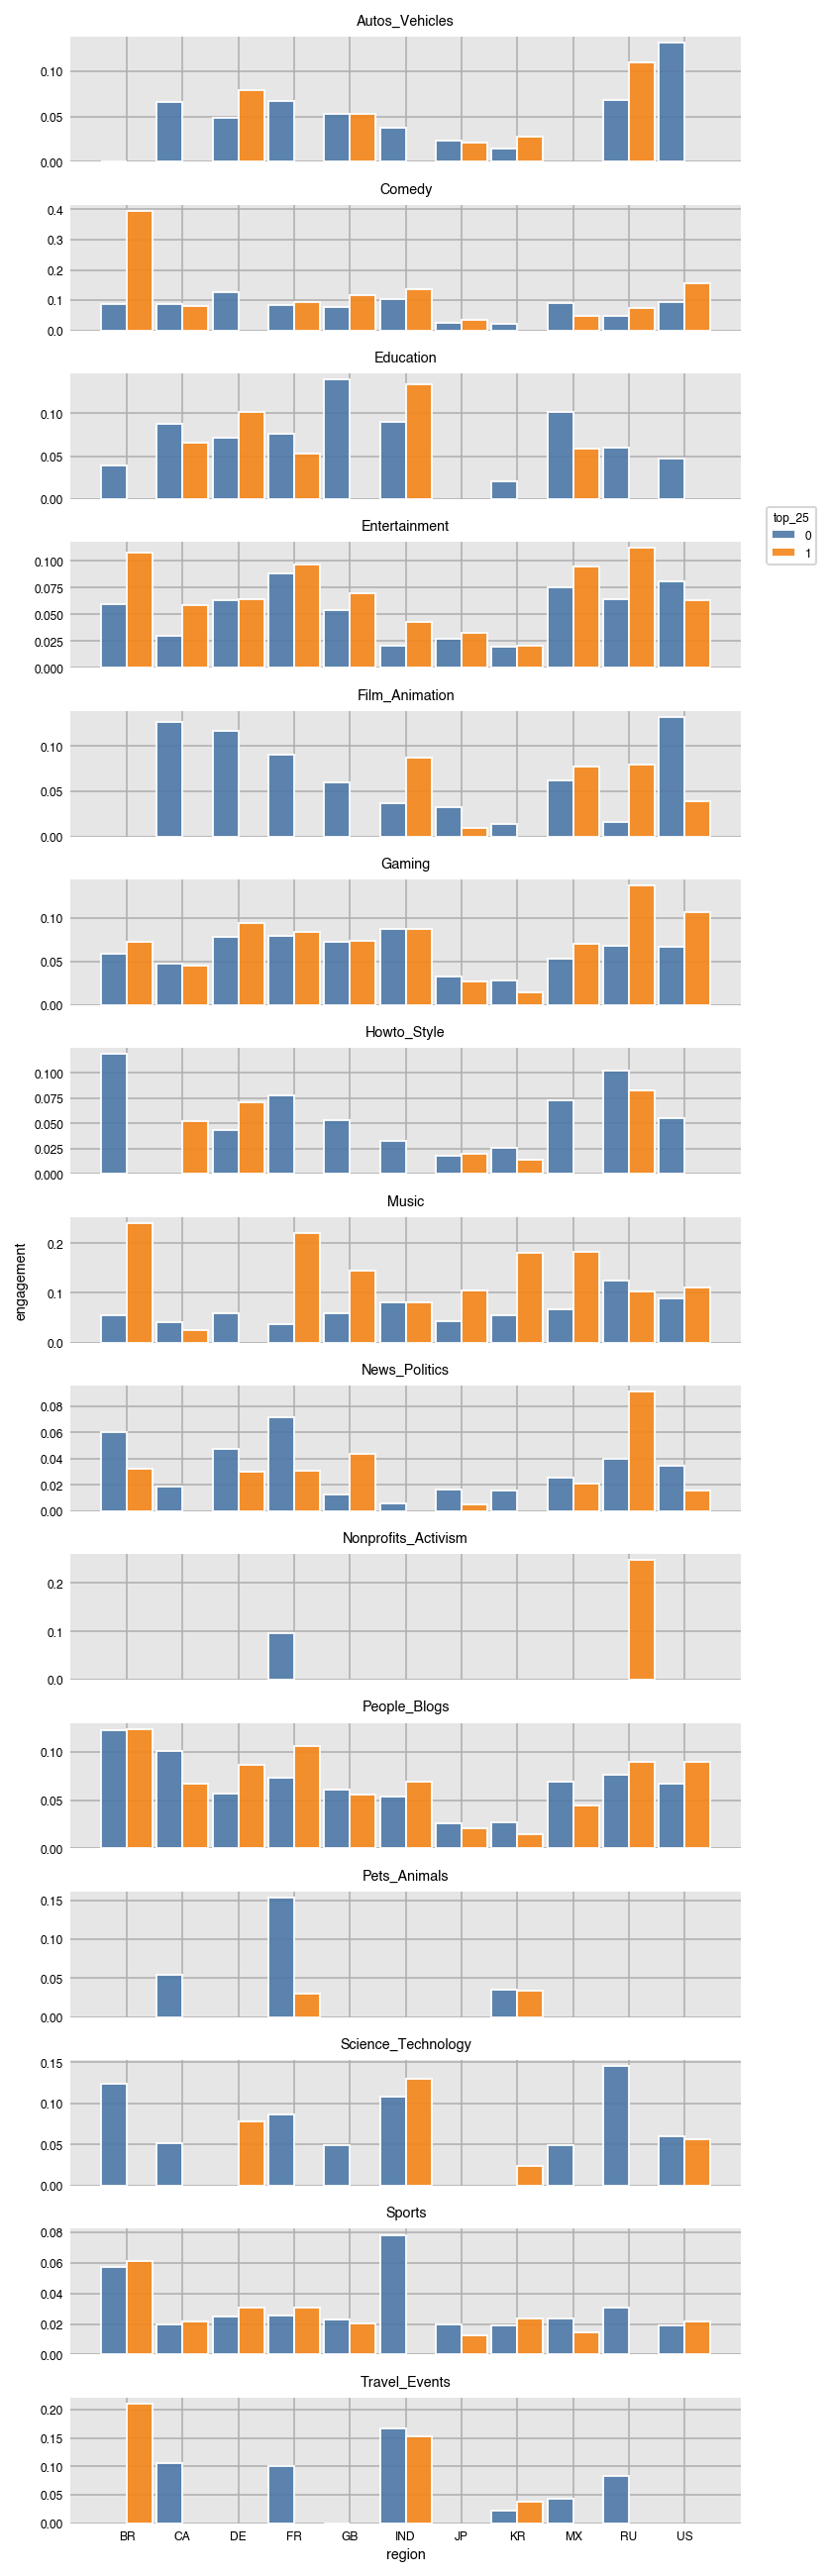

In [24]:
dxp.bar(x='region', y='engagement',split='top_25', data=df, aggfunc='median',\
        row='categoryId', sharey=False,
        title='')

/opt/homebrew/anaconda3/lib/python3.9/site-packages/dexplot/_common_plot.py:156: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  self.data[name].cat.remove_unused_categories(inplace=True)


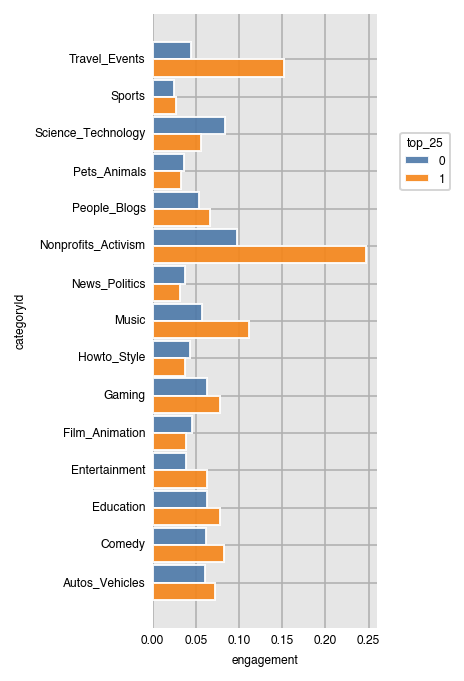

In [25]:
dxp.bar(x='engagement', y='categoryId',split='top_25', data=df, aggfunc='median', orientation='h',\
     title='')

## Sponsored?


<AxesSubplot:ylabel='Frequency'>

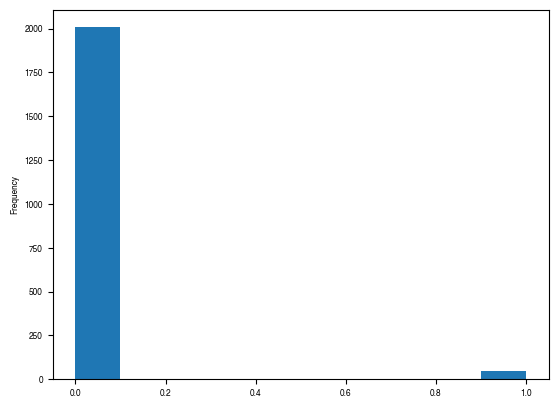

In [27]:
df.sponsored.plot.hist()

<AxesSubplot:>

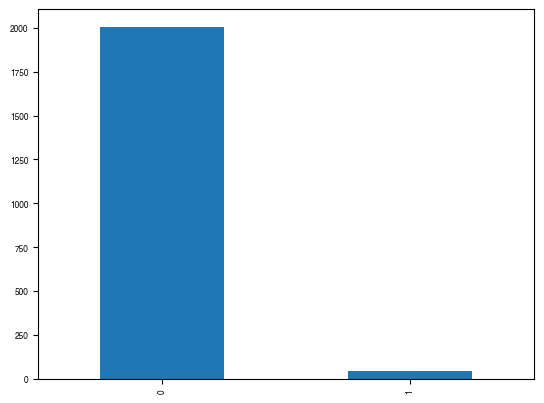

In [28]:
df.sponsored.value_counts().plot.bar()

## Video Region

Takeaways 

/opt/homebrew/anaconda3/lib/python3.9/site-packages/dexplot/_common_plot.py:156: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  self.data[name].cat.remove_unused_categories(inplace=True)


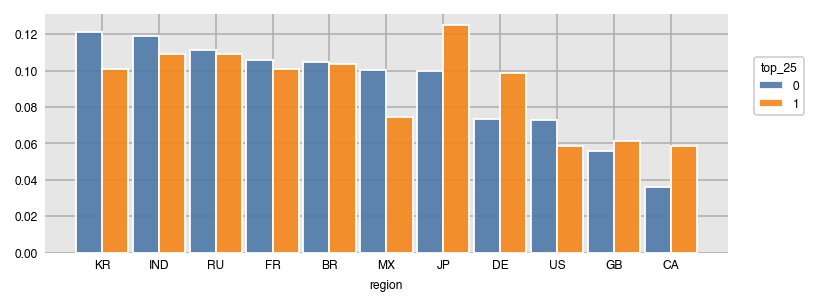

In [29]:
dxp.count('region', data=df, split='top_25', normalize='top_25')

In [30]:
df.categoryId.unique()

array(['Entertainment', 'Film_Animation', 'People_Blogs', 'Gaming',
       'Sports', 'Comedy', 'News_Politics', 'Science_Technology', 'Music',
       'Education', 'Autos_Vehicles', 'Howto_Style', 'Pets_Animals',
       'Travel_Events', 'Nonprofits_Activism'], dtype=object)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/dexplot/_common_plot.py:156: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  self.data[name].cat.remove_unused_categories(inplace=True)


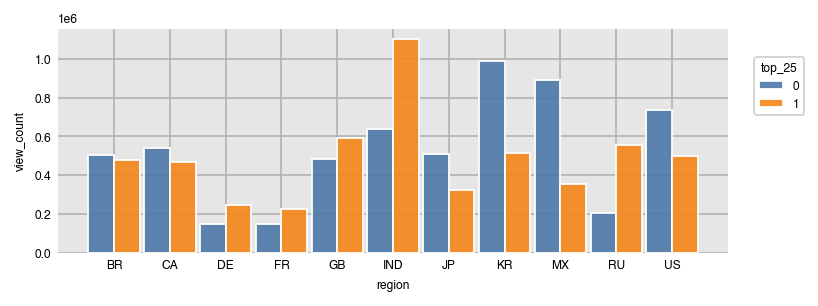

In [31]:
dxp.bar(x='region', y='view_count',split='top_25', data=df, aggfunc='median',\
     title='')

## Percent of capital letters in title 


## When we talk about subscribers we can take a look at age of channel


## How to drive up subscribers is a slightly separate question but we can ask it


## At what point does the video view count pass the subscriber view count


## Let’s think about tags and how many words they have in common with the descriptions


In [33]:
word_vault = list()
for row in df.index:
   word_vault.extend(df.iloc[row].word_bank)

In [54]:
top_25_words = list()
for row in df[df.top_25==1].index:
    top_25_words.extend(df[df.top_25==1].loc[row].word_bank)

In [56]:
outside_25_words = list()
for row in df[df.top_25!=1].index:
    outside_25_words.extend(df[df.top_25!=1].loc[row].word_bank)
    

In [59]:
df[df.top_25!=1].loc[1410].title

'@Marine LB M’APPREND À CONDUIRE À PARIS ( on a eu chaud )'

In [38]:
testy = ''.join(word_vault)

(-0.5, 399.5, 199.5, -0.5)

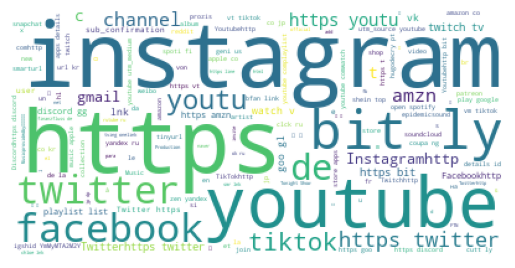

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

img = WordCloud(background_color='white').generate(testy)
plt.imshow(img)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

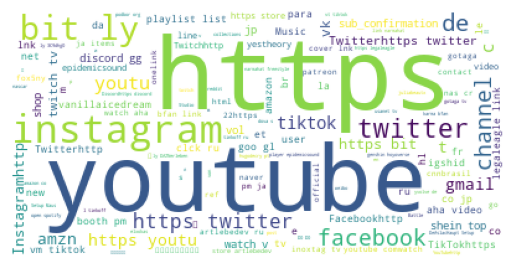

In [40]:
img = WordCloud(background_color='white').generate(''.join(top_25_words))
plt.imshow(img)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

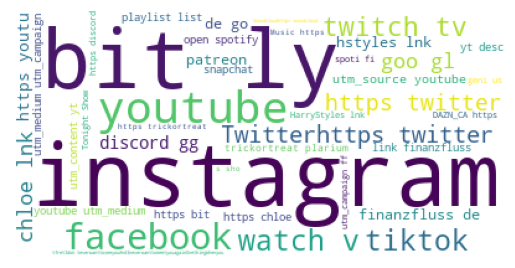

In [ ]:
img = WordCloud(background_color='white').generate(''.join(outside_25_words))
plt.imshow(img)
plt.axis('off')

In [ ]:
len(word_vault)

150675

In [ ]:
top_25_words_freq = pd.Series(top_25_words).value_counts()
outside_25_words_freq = pd.Series(outside_25_words).value_counts()
all_words_freq = pd.Series(word_vault).value_counts()

NameError: name 'pd' is not defined

In [47]:
df.cleaned_tags.apply(lambda x: len(x))

0       72
1       25
2       33
3       38
4       38
        ..
2048     2
2049     9
2050     1
2051     2
2052    14
Name: cleaned_tags, Length: 2053, dtype: int64

In [ ]:
df[df.title_in_description == 0 ]

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,...,captions,rank,age,engagement,sponsored,num_of_tags,cleaned_tags,cleaned_desc,top_25,title_in_description
1,d2Dw-PuNZSE,Dark Secrets of the World’s Most Isolated Island,2022-10-30 17:00:21+00:00,Yes Theory,Entertainment,2022-10-31 00:00:00+00:00,yestheory seek discomfort yes theory strangers...,1168864,53667,3307,...,False,2,6.994167,0.057231,0,7,"{yestheory, out, strangers, FBA, getting, subs...","{Traveling, https://twitter.com/yestheory, Boo...",1,0
2,nUDTWLfrUsg,"LFR16 - Game 10 - OVER - TOR 3, ANA 4 (OT)",2022-10-31 06:10:01+00:00,SteveDangle,Sports,2022-10-31 00:00:00+00:00,Hockey NHL Steve Dangle Toronto Maple Leafs Ma...,90257,7248,1946,...,True,3,-6.166944,0.166547,1,26,"{ta, game, fan, leaf, Leafs, toronto, winner, ...","{Raiders, https://www.sdpn.ca/SDPN, Leafs, and...",1,0
3,L2DGv2bmsqo,Dawn of the Phyrexian Invasion - Official Cine...,2022-10-30 17:59:03+00:00,Magic: The Gathering,Gaming,2022-10-31 00:00:00+00:00,magic mtg wizards wotc planeswalkers tcg tradi...,9660567,9111,1021,...,True,4,6.015833,0.001366,0,13,"{wotc, collectible, game, arena, magic, tradin...","{will, weary, Prerelease, Dominaria, Magic, is...",1,0
4,MIHPNoRJ1p0,Scoring 1 AMAZING Goal From 1-40 Yards,2022-10-30 21:30:06+00:00,ChrisMD,Entertainment,2022-10-31 00:00:00+00:00,[none],1246886,85865,1222,...,False,5,2.498333,0.072784,0,1,"{none, [}","{Lickd, shopping, you, improve, me, license, F...",1,0
5,HlkORTHy8DU,Big Changes Coming (channel update),2022-10-30 15:00:08+00:00,Eamon & Bec,Travel_Events,2022-10-31 00:00:00+00:00,van life living in a van vanlife eamon and bec...,405505,25403,7843,...,False,6,8.997778,0.140011,0,15,"{bec, and, year, life, vanlife, silent, change...","{edition, Bob, Shop, profits, you, go, cabin3:...",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,fHP_XpX9ZLU,Kenia OS - Año Sabático (Letra / Lyrics),2022-10-27 00:05:11+00:00,KeniaOSVEVO,Music,2022-10-31 00:00:00+00:00,kenia os año sabatico kenia os año sabatico ke...,1157145,122705,9269,...,False,192,95.913611,0.138082,0,30,"{nuevo, musica, pop, 2022, para, bailar, año, ...","{en›, le, tan, caben, me, peca’os, esoLos, vue...",0,0
193,toZwINwNK_g,The Suspish Sitter- Helen Patricia Moore| Myst...,2022-10-24 19:00:31+00:00,Bailey Sarian,Entertainment,2022-10-31 00:00:00+00:00,Bailey sarian youtube bailey sarian bailey sar...,1588912,80577,4828,...,True,194,148.991389,0.062866,0,28,"{history, bailey, artist, new, and, monday mon...","{Soft, Mascarahttps://shop-links.co/cijkWGNOYp...",0,0
194,3JYZxlnN7hc,PSG vs. Maccabi Haifa: Extended Highlights | U...,2022-10-25 21:09:32+00:00,CBS Sports Golazo,Sports,2022-10-31 00:00:00+00:00,Maccabi Haifa Paris Saint-Germain Paris Saint-...,957838,11997,1372,...,False,195,122.841111,0.018255,0,3,"{Saint, Maccabi, Paris Saint-Germain Paris Sai...","{#UCL #, uefa, win, will, shows, have, on, PSG...",0,0
198,NaO_2aTBbLA,1v1 vs Tik Tok Hooper YPK Raye!,2022-10-25 22:53:41+00:00,CashNasty,Entertainment,2022-10-31 00:00:00+00:00,1v1 1v1 basketball basketball entertainment ba...,432848,21614,1532,...,False,199,121.105278,0.064092,1,23,"{toks, raye, basketball, moments, compilation,...","{order, raye, www.twitter.com/cashnastygamingI...",0,0


In [ ]:
df.loc[0, 'cleaned_tags']

0    {Championship, silva, Anderson, HIGHLIGHTS, An...
0    {Bulletproof, Meiecke Knossi, 2, Behind, vs., ...
0    {BT, Deontay, Benn, Boxing, Derek, Dana White ...
0    {GⅢ, カデナ, C.ルメール, 秋, J・GⅢ, ユーバーレーベン, 松山, ダノンベル...
0    {Nxde, 거울, 아이들아는형님, 미연공주, 여자아이들, 아이들, 신동, 여자아이...
0    {fútbol, 2022, Pachuca, en, Resumen del, MARCA...
0    {24, а4, в, Влад, на, Часа, мерседерс, новая, ...
0    {silva, showtime, CBS CBS Sports, vs., anderso...
Name: cleaned_tags, dtype: object

## We can target placing videos in/out of the top 25 


## Convert Duration

# Exploration

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


<AxesSubplot:>

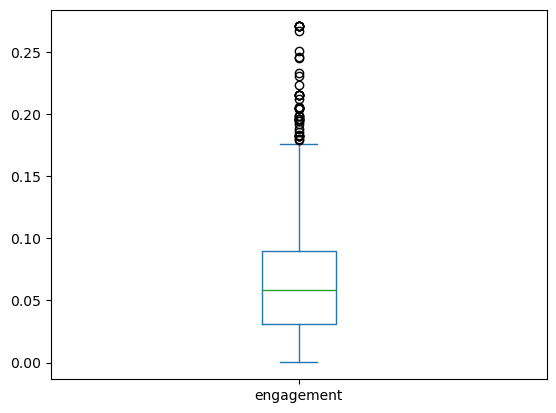

In [ ]:
df.engagement.plot.box()

<AxesSubplot:>

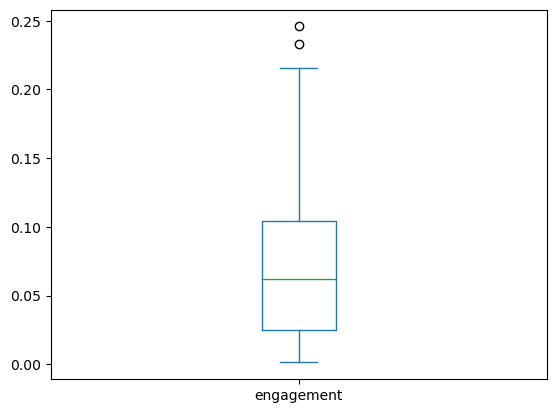

In [ ]:
df[df.top_25 == 1].engagement.plot.box()

<AxesSubplot:>

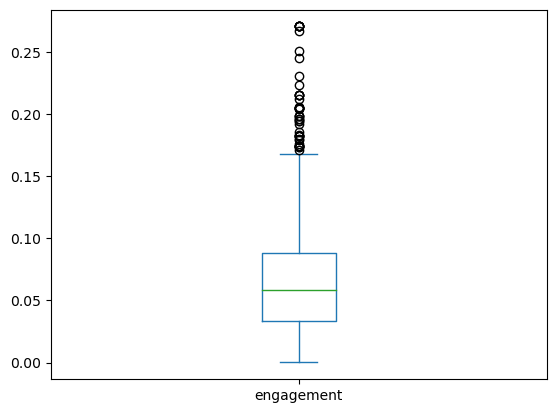

In [ ]:
df[df.top_25 != 1].engagement.plot.box()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1229 entries, 0 to 199
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   video_id       1229 non-null   object             
 1   title          1229 non-null   object             
 2   publishedAt    1229 non-null   datetime64[ns, UTC]
 3   channelTitle   1229 non-null   object             
 4   categoryId     1229 non-null   object             
 5   trending_date  1229 non-null   datetime64[ns, UTC]
 6   tags           1229 non-null   object             
 7   view_count     1229 non-null   object             
 8   likes          1229 non-null   object             
 9   comment_count  1229 non-null   object             
 10  description    1229 non-null   object             
 11  duration       1229 non-null   int64              
 12  captions       1229 non-null   object             
 13  rank           1229 non-null   int64             

## Takeaways
* engagement higher with top 25 videos

In [ ]:
df.engagement = df.engagement.astype(float)

In [ ]:
df.engagement

0      0.020040
1      0.057231
2      0.166547
3      0.001366
4      0.072784
         ...   
195    0.089409
196    0.117895
197    0.067428
198    0.064092
199    0.027896
Name: engagement, Length: 1229, dtype: float64

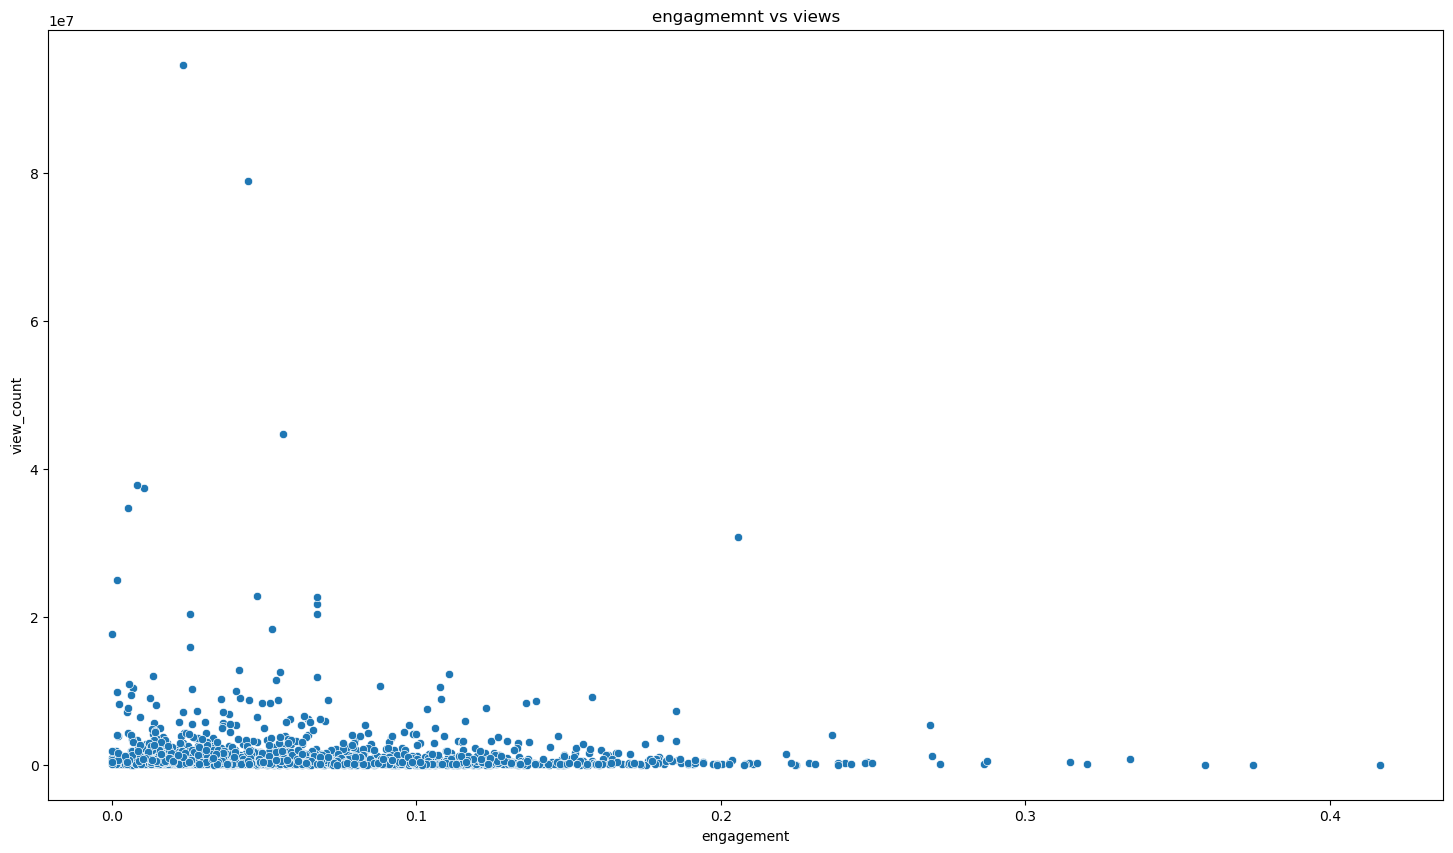

In [5]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(18,10))
sns.scatterplot(data=df,x='engagement',y='view_count')
plt.title('engagmemnt vs views')
plt.show()

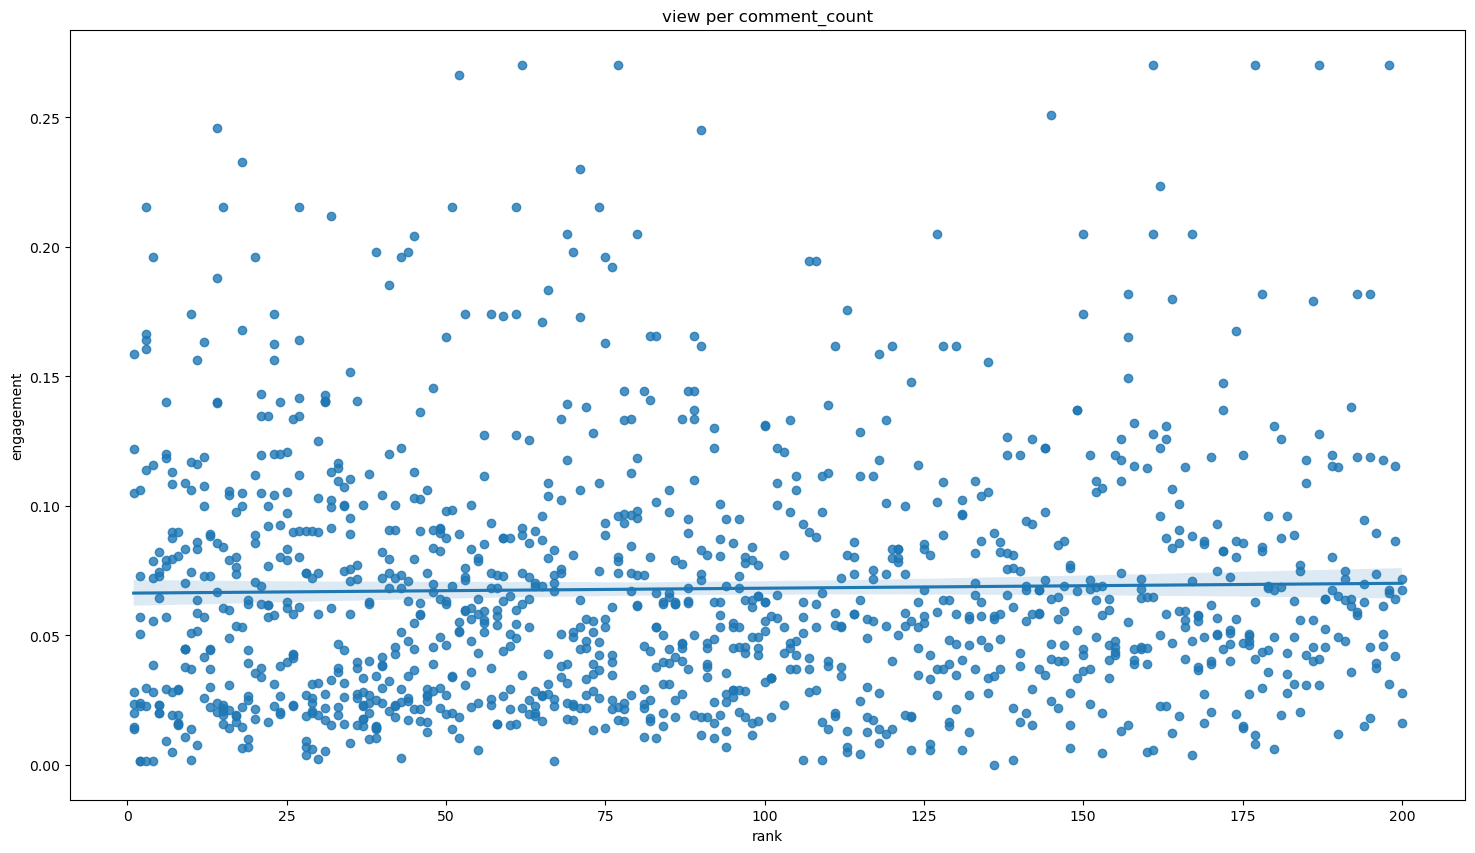

In [ ]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(18,10))
sns.regplot(data=df,x='rank',y='engagement')
plt.title('view per comment_count')
plt.show()

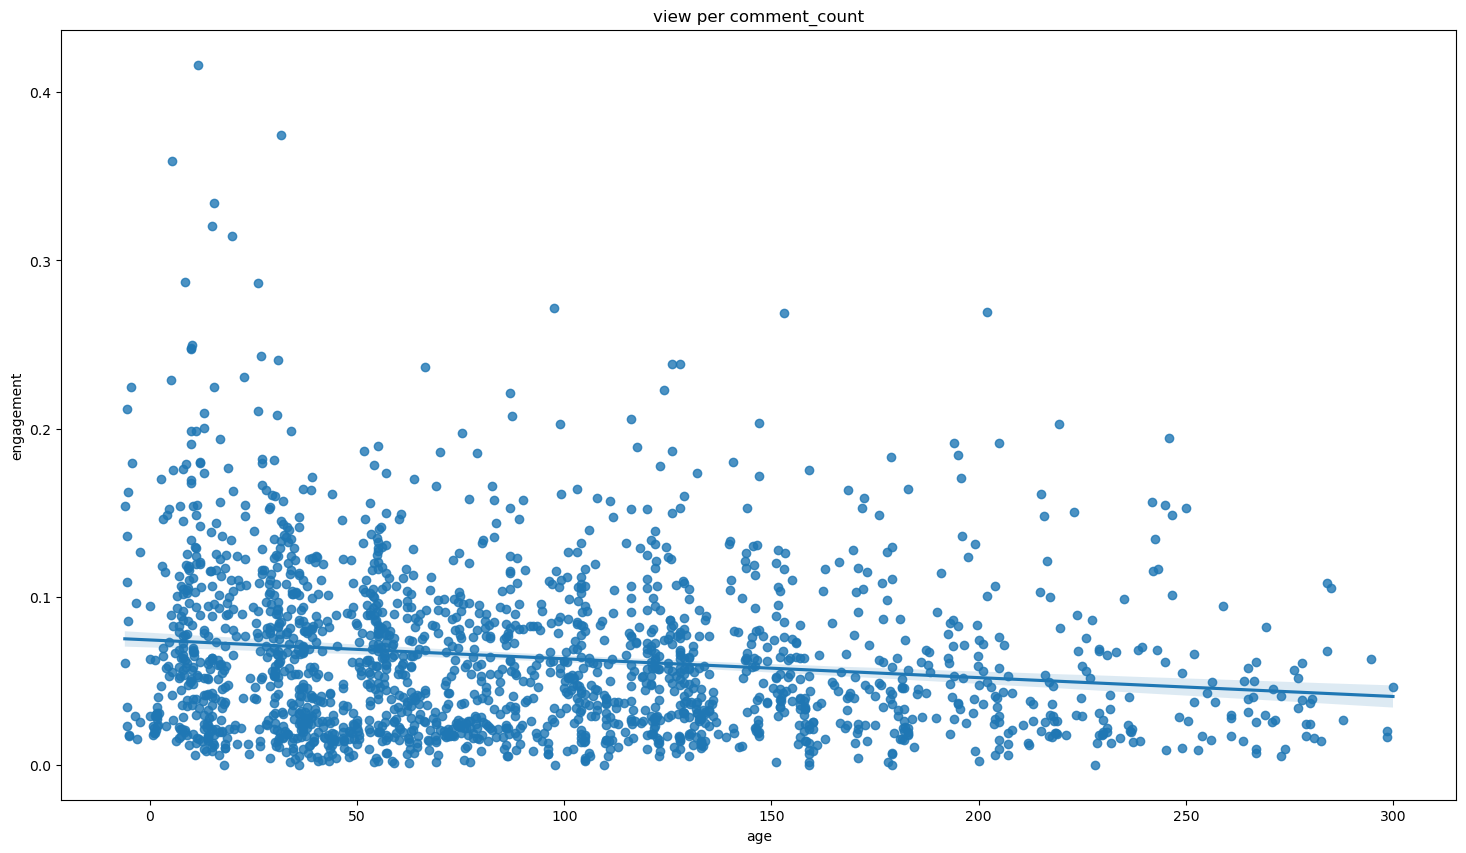

In [56]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(18,10))
sns.regplot(data=df[df.age < 300],x='age',y='engagement')
plt.title('view per comment_count')
plt.show()

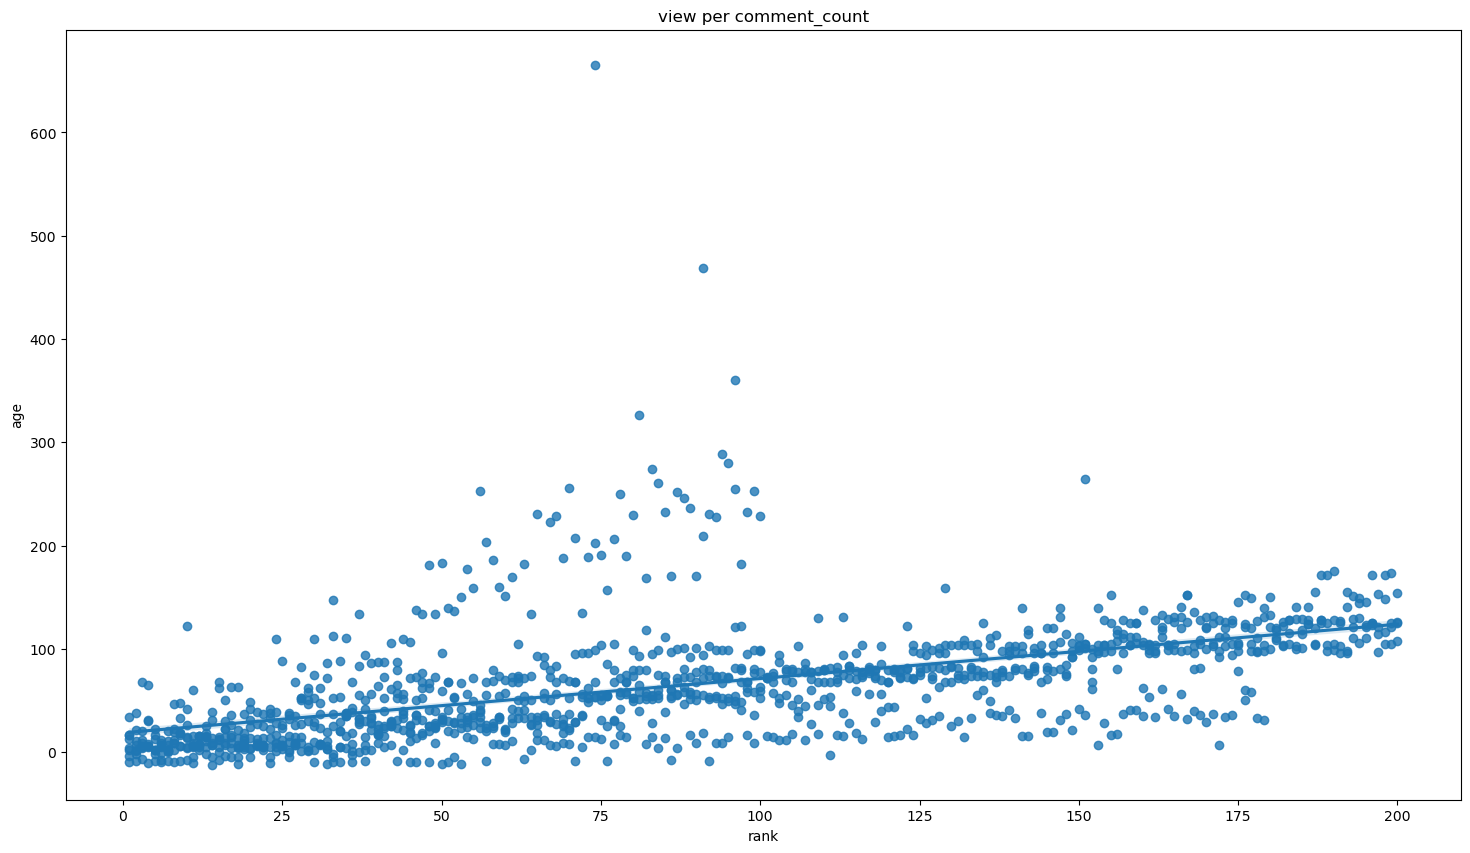

In [ ]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(18,10))
sns.regplot(data=df,x='rank',y='age')
plt.title('view per comment_count')
plt.show()

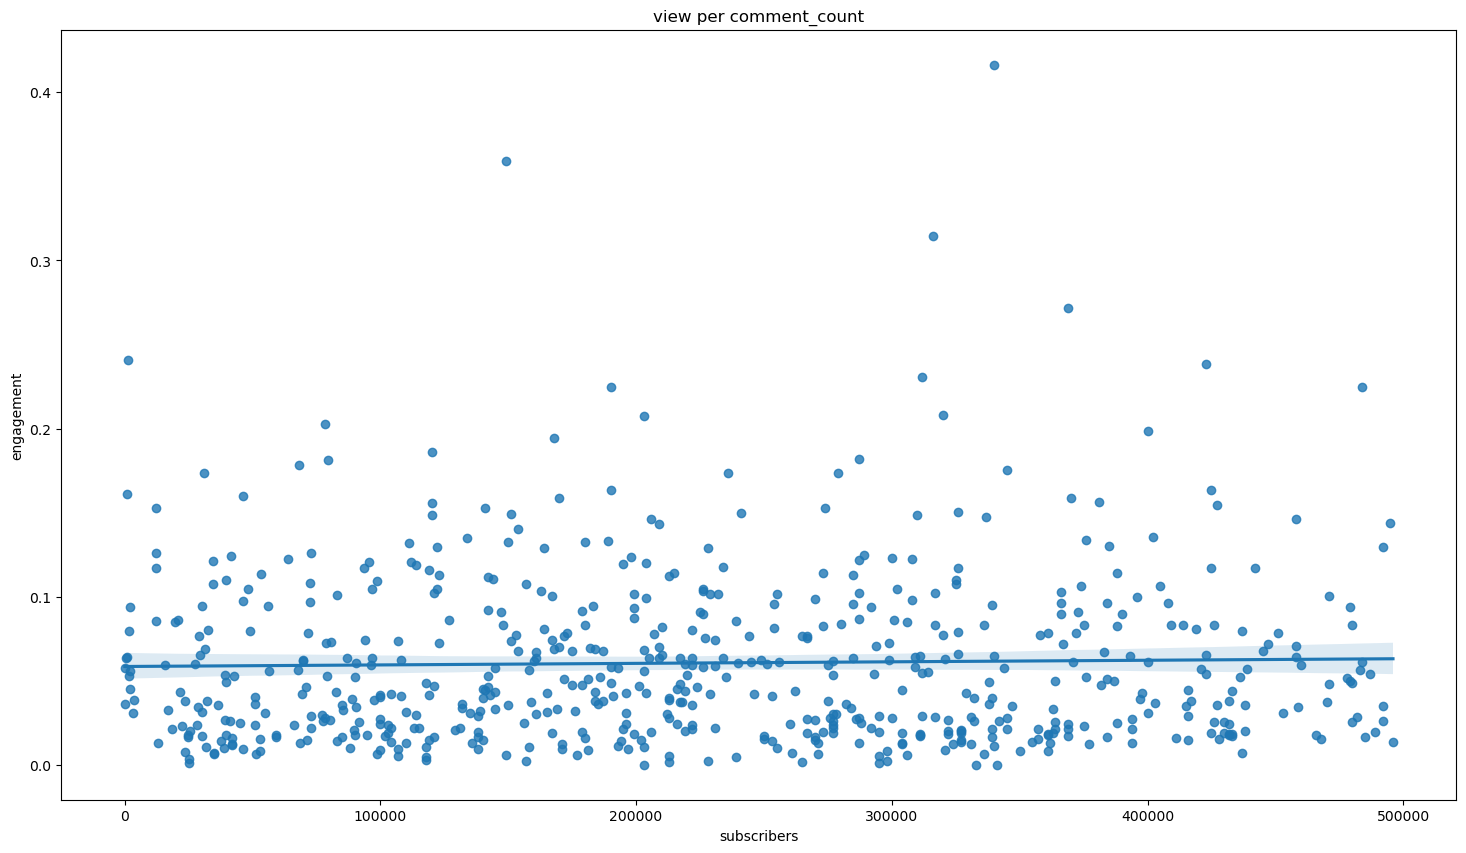

In [11]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(18,10))
sns.regplot(data=df[df.subscribers<500000],x='subscribers',y='engagement')
plt.title('view per comment_count')
plt.show()

In [17]:
df.select_dtypes('number').columns

Index(['view_count', 'likes', 'comment_count', 'duration', 'rank', 'top_25',
       'subscribers', 'video_count', 'age', 'engagement', 'sponsored',
       'num_of_tags', 'title_in_description', 'title_in_tags',
       'pct_tags_in_description', 'title_lengths', 'desc_lengths',
       'tags_length'],
      dtype='object')

<AxesSubplot:>

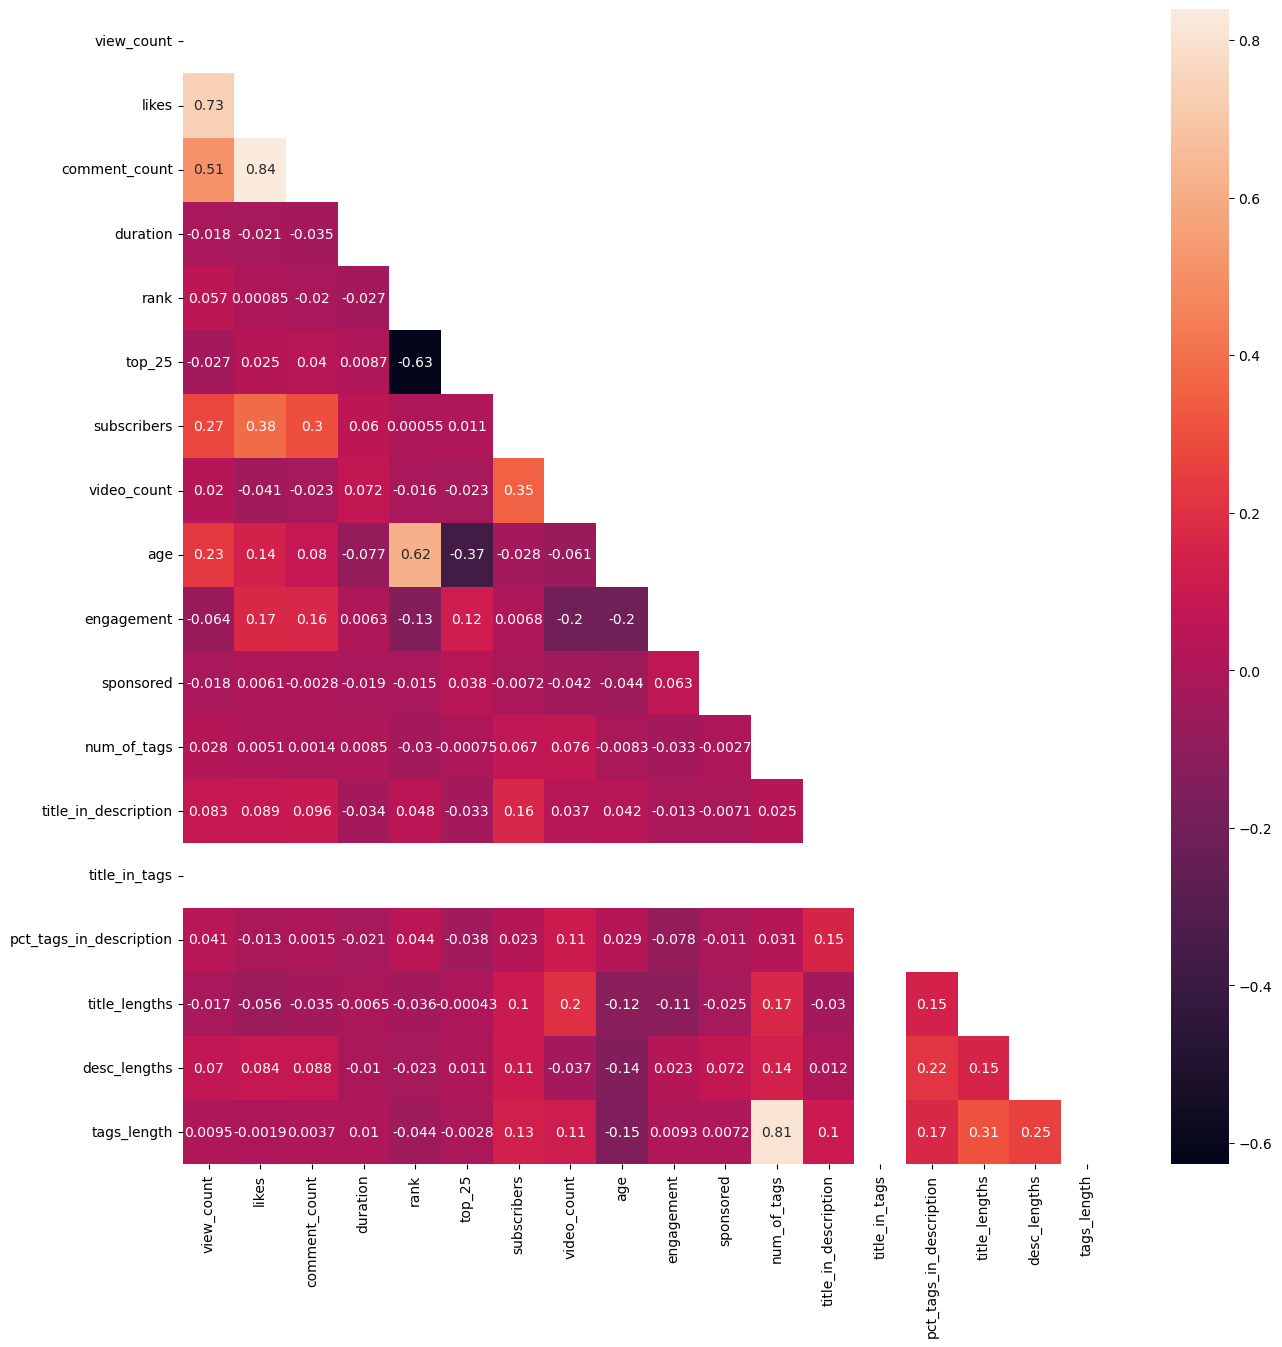

In [30]:

plt.figure(figsize=(15,15))

sns.heatmap(data=df.select_dtypes('number').corr(), \
    mask=np.triu(df.select_dtypes('number').corr()),\
    annot=True)


<AxesSubplot:ylabel='Frequency'>

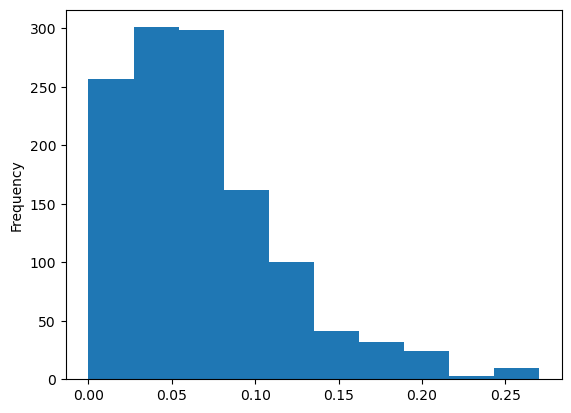

In [ ]:
df.engagement.plot.hist()

<AxesSubplot:ylabel='Frequency'>

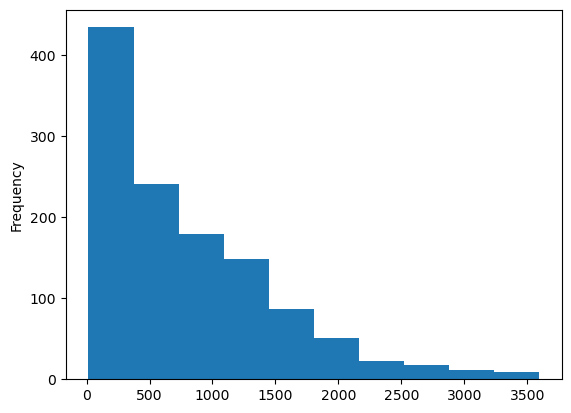

In [ ]:
df.duration.plot.hist()

In [ ]:
top_25 = df[df.top_25 == 1].copy()
outside_25 = df[df.top_25 != 1].copy()

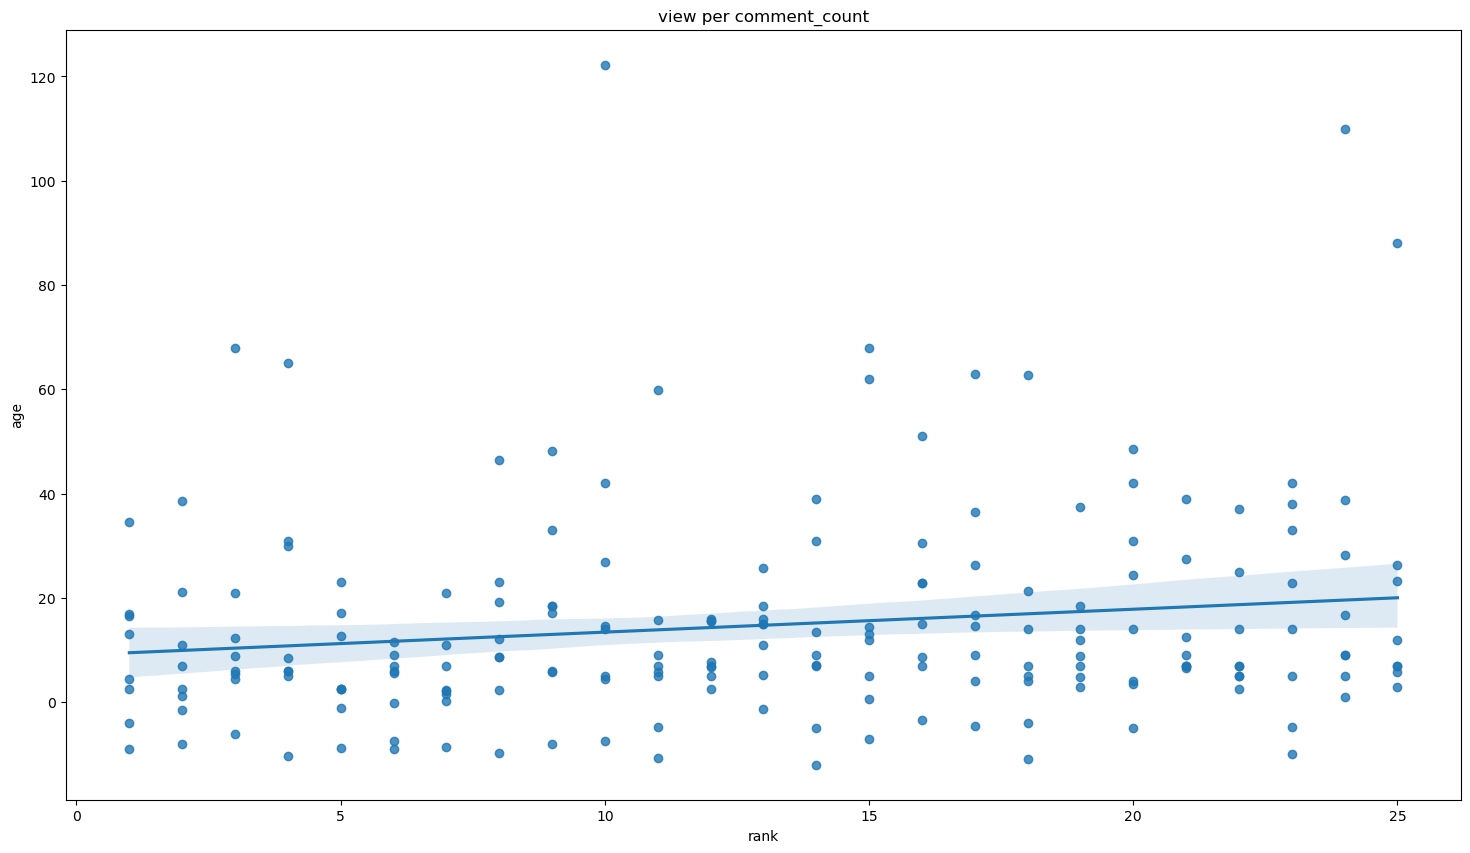

In [ ]:
plt.figure(figsize=(18,10))
sns.regplot(data=top_25,x='rank',y='age')
plt.title('view per comment_count')
plt.show()

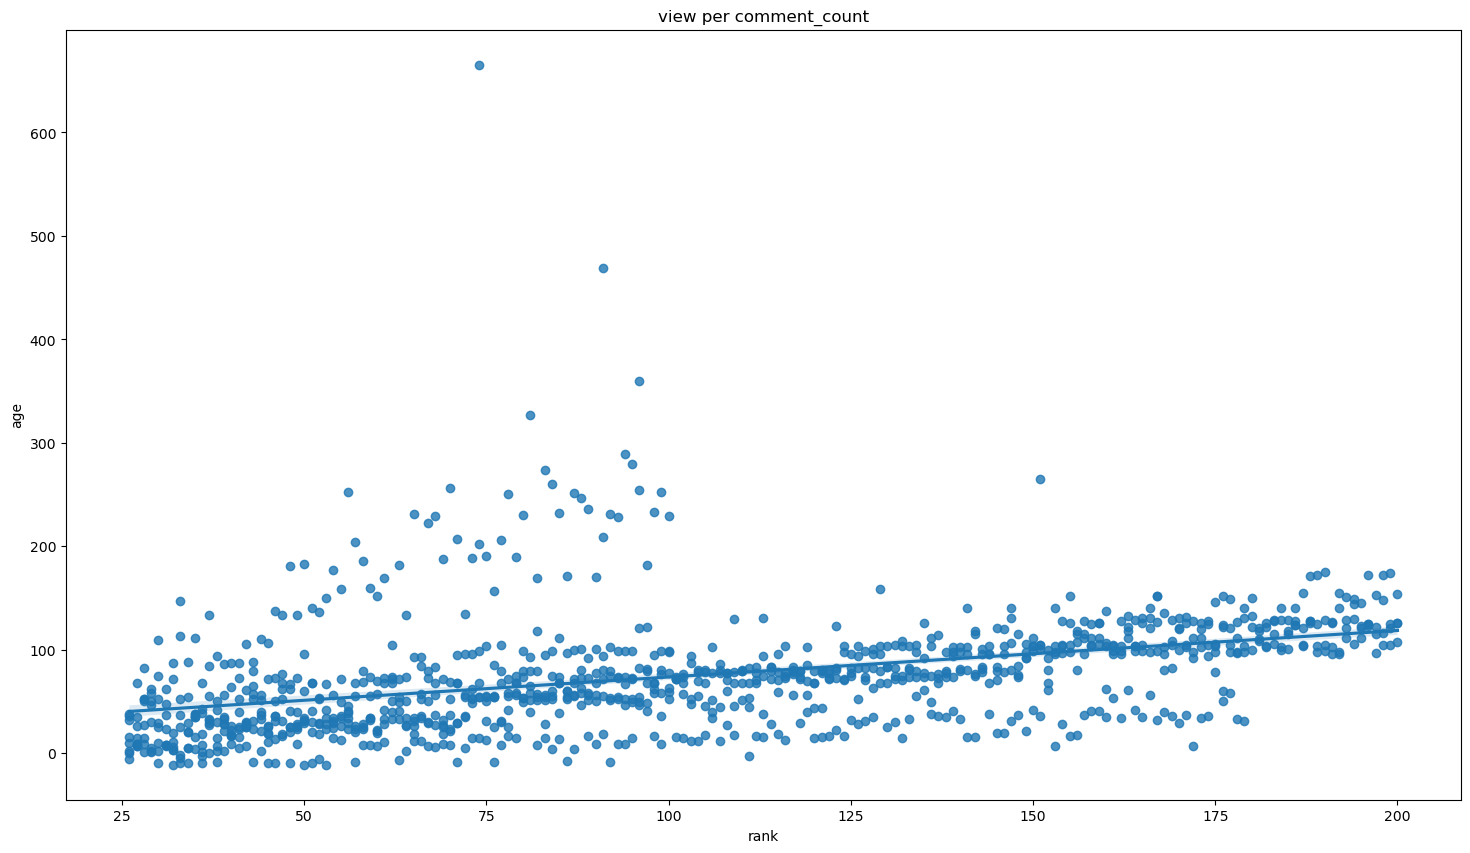

In [ ]:
plt.figure(figsize=(18,10))
sns.regplot(data=outside_25,x='rank',y='age')
plt.title('Appears to be correlation between rank and age of video.')
plt.show()

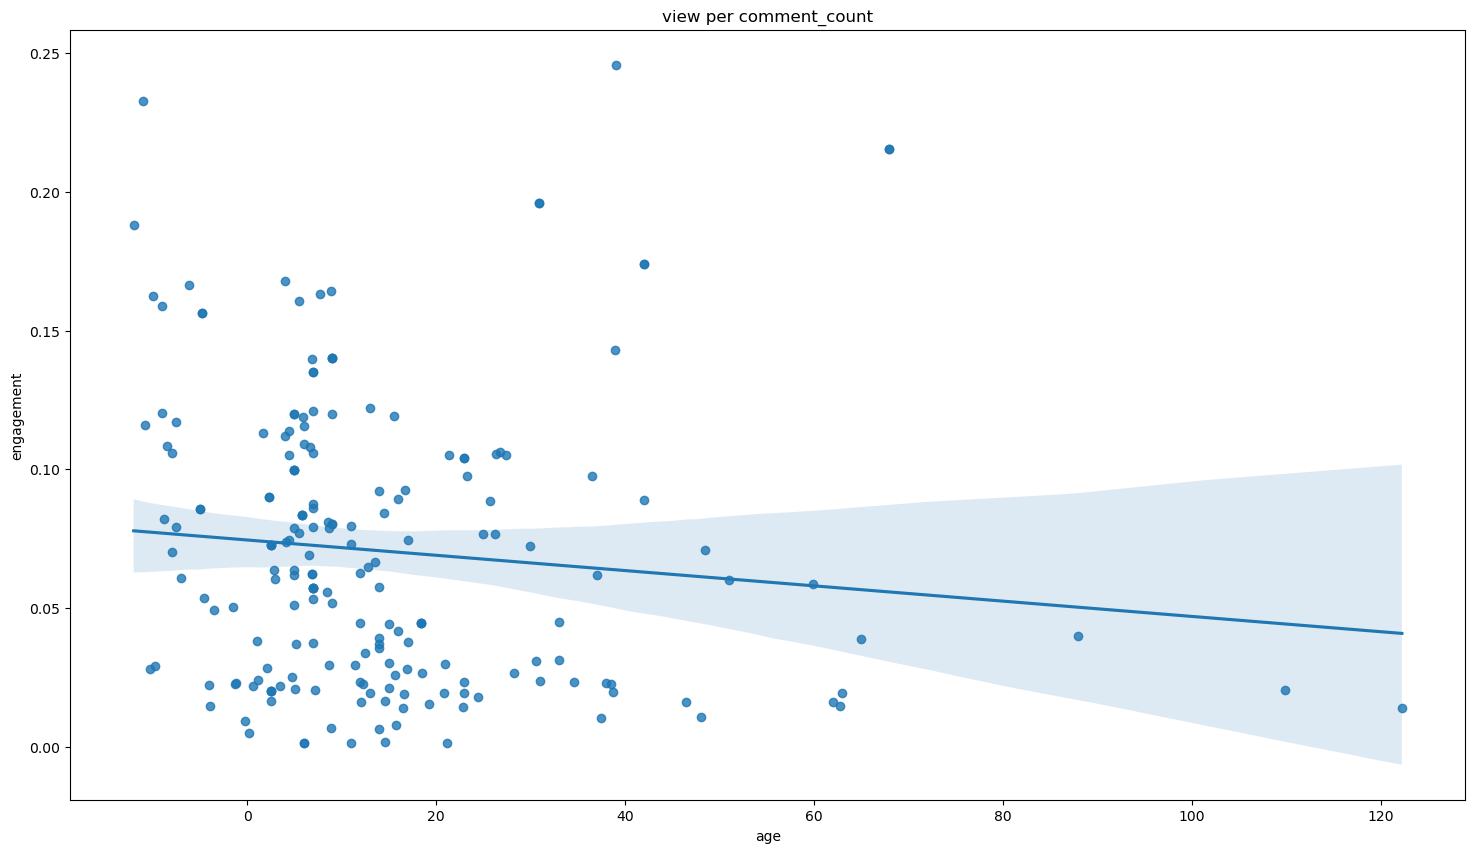

In [ ]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(18,10))
sns.regplot(data=top_25,x='age',y='engagement')
plt.title('Older videos recieve less engagement')
plt.show()

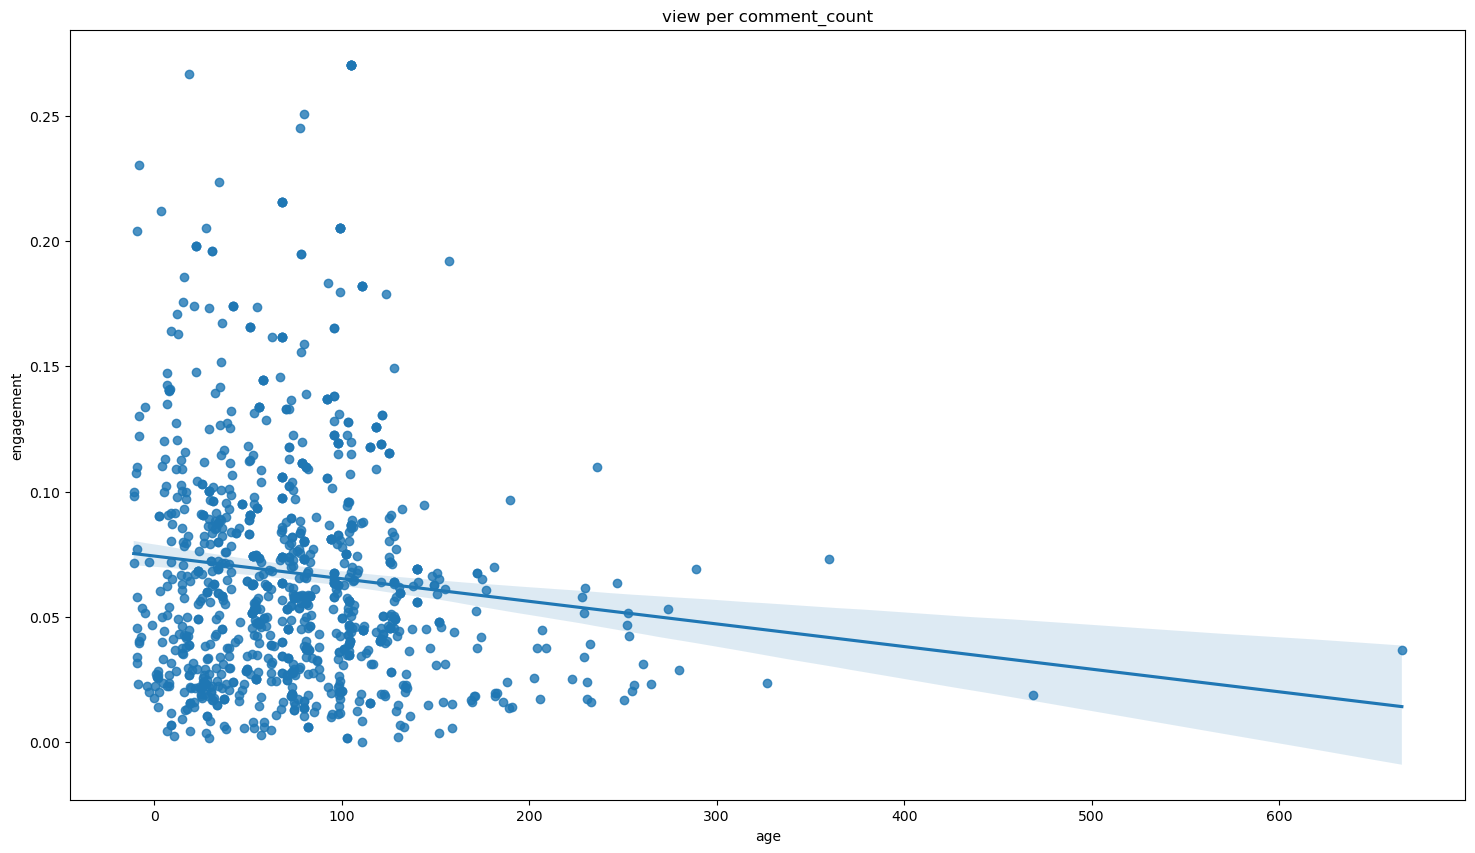

In [ ]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(18,10))
sns.regplot(data=outside_25,x='age',y='engagement')
plt.title('view per comment_count')
plt.show()

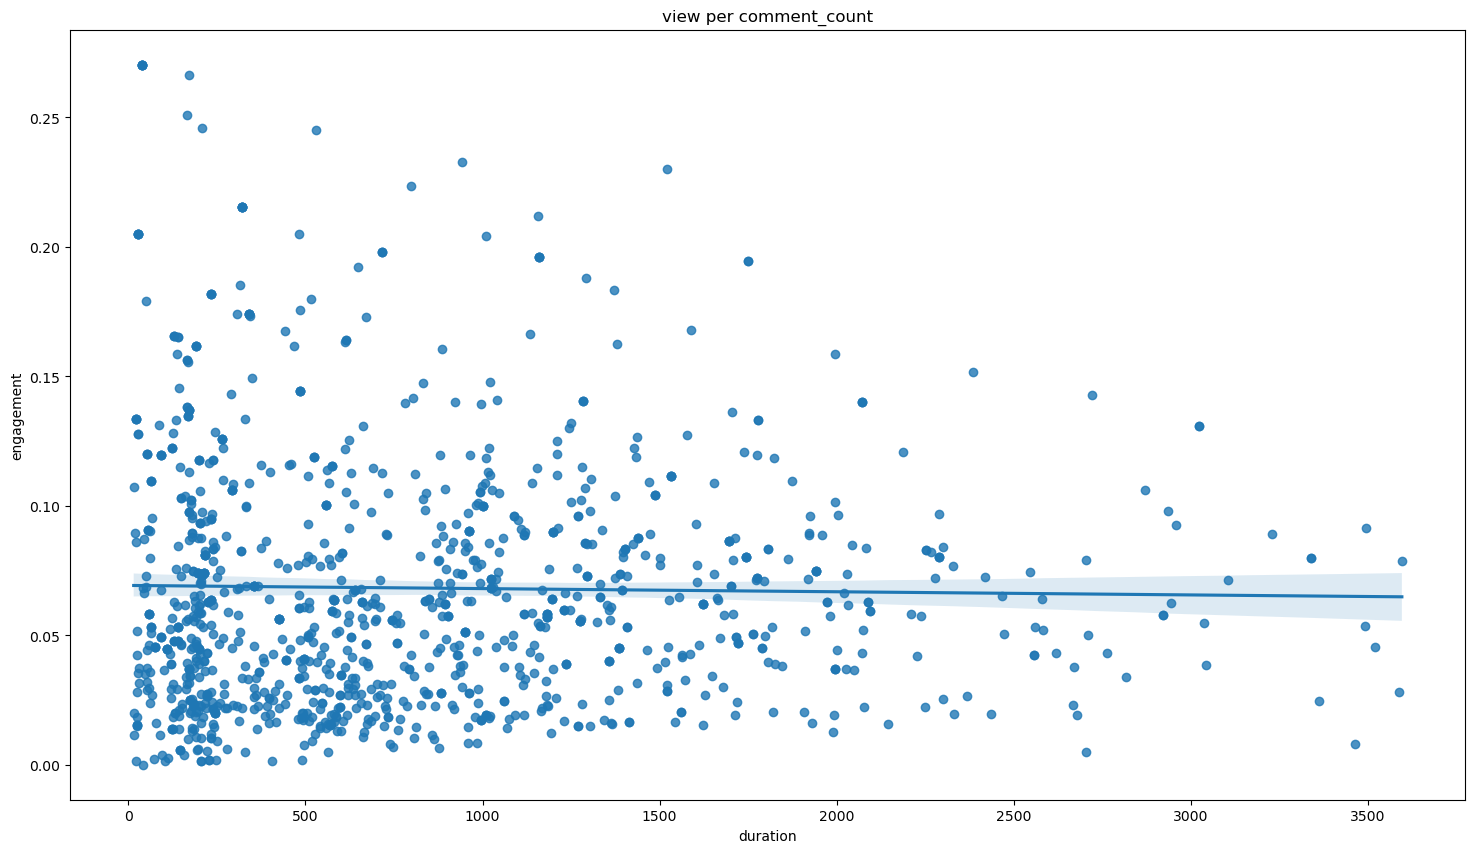

In [ ]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(18,10))
sns.regplot(data=df[df.duration < 20000],x='duration',y='engagement')
plt.title('view per comment_count')
plt.show()

In [ ]:

# import necessary libraries
import pandas as pd
import os
import glob
  
def acquire ():
    # use glob to get all the csv files 
    # in the folder
    path = os.getcwd()
    csv_files = glob.glob(os.path.join(path, "*.csv"))
    
    testy = pd.DataFrame()  
    # loop over the list of csv files
    for f in csv_files:
        
        # read the csv file
        pesty = pd.read_csv(f)
        
        # print the location and filename
        print('Location:', f)
        print('File Name:', f.split("\\")[-1][-13:-11])
        pesty['region']=f.split("\\")[-1][-13:-11]
        print(pesty.region)

        testy= pd.concat([testy, pesty])
        
        # print the content
        # print('Content:')
        # display(df)
        # print()

    return testy

Location: /Users/sinao/codeup-data-science/top_200/Tue Nov  1 16:03:01 2022_KR_videos.csv
File Name: KR
0      KR
1      KR
2      KR
3      KR
4      KR
       ..
195    KR
196    KR
197    KR
198    KR
199    KR
Name: region, Length: 200, dtype: object
Location: /Users/sinao/codeup-data-science/top_200/Wed Nov  2 09:05:13 2022_MX_videos.csv
File Name: MX
0      MX
1      MX
2      MX
3      MX
4      MX
       ..
195    MX
196    MX
197    MX
198    MX
199    MX
Name: region, Length: 200, dtype: object
Location: /Users/sinao/codeup-data-science/top_200/Tue Nov  1 16:01:48 2022_CA_videos.csv
File Name: CA
0      CA
1      CA
2      CA
3      CA
4      CA
       ..
195    CA
196    CA
197    CA
198    CA
199    CA
Name: region, Length: 200, dtype: object
Location: /Users/sinao/codeup-data-science/top_200/Wed Nov  2 08:01:47 2022_IN_videos.csv
File Name: IN
0      IN
1      IN
2      IN
3      IN
4      IN
       ..
181    IN
182    IN
183    IN
184    IN
185    IN
Name: region, Length:

In [ ]:
testy

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,duration,captions,region
0,sWwHWK7OYJ8,[ENG][아형✪하이라이트] (여자)아이들 완전체 떴다↗ 멋짐 폭발♥ 5인 5색 토...,2022-10-29T13:26:44Z,아는형님 Knowingbros,24,22.01.11,아는 형님|형님|형님 학교|미연|민니|소연|우기|슈화|아이들|여자아이들|강호동|이수...,1098919,19090,861,https://i.ytimg.com/vi/sWwHWK7OYJ8/default.jpg,False,False,[아형✪하이라이트] (여자)아이들 완전체 떴다↗ 멋짐 폭발♥ 5인 5색 토크 모음....,PT21M21S,True,KR
1,1_VsbIFIh8U,10 Things Jin (진) of BTS (방탄소년단) Can't Live Wi...,2022-10-31T16:00:16Z,GQ,24,22.01.11,(방탄소년단)|(방탄소년단) gq|10 essentials|10 essentials...,1670293,231953,6345,https://i.ytimg.com/vi/1_VsbIFIh8U/default.jpg,False,False,There are a few things Jin (진) of BTS can't li...,PT8M9S,False,KR
2,SFVzIrEYQKU,[#편스토랑] 박수홍 신혼집 대공개❤ 애정 가득한 인테리어에 깨소금 냄새!!|KBS...,2022-10-29T09:30:05Z,KBS 한국방송,24,22.01.11,KBS|한국방송공사|mylovekbs|예고|티저|김나영|붐|나영|수홍|박수홍엄마|유...,841292,12902,1378,https://i.ytimg.com/vi/SFVzIrEYQKU/default.jpg,False,False,박수홍 신혼집 대공개❤ 애정 가득한 인테리어에 깨소금 냄새!!0:56 편스토랑 출연...,PT13M8S,False,KR
3,c6ASQOwKkhk,진 (Jin) 'The Astronaut' Official MV,2022-10-28T04:00:01Z,HYBE LABELS,10,22.01.11,HYBE|HYBE LABELS|하이브|하이브레이블즈,30998614,4340713,501383,https://i.ytimg.com/vi/c6ASQOwKkhk/default.jpg,False,False,진 (Jin) 'The Astronaut' Official MVCredits: D...,PT5M20S,True,KR
4,CYn8OlO7cbg,솔의눈 슬러시가 최약체인 키친마이야르 시즌3 신메뉴 제작기,2022-10-31T11:15:01Z,승우아빠,24,22.01.11,승우아빠|키친마이야르|시즌3메뉴|신메뉴|키친마이야르 신메뉴|솔의눈|솔의눈 슬러시|키...,343269,5389,581,https://i.ytimg.com/vi/CYn8OlO7cbg/default.jpg,False,False,#승우아빠 #키친마이야르 #시즌3오늘은 키친마이야르 시즌3의 신 메뉴 제작과정을 담...,PT16M29S,False,KR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,8Itwp2_LMr0,"Cash | Like, Share & Subscribe Team-Santosh So...",2022-10-29T18:00:03Z,etvteluguindia,24,22.01.11,cash latest promo|latest promo|cash promo late...,929198,13829,193,https://i.ytimg.com/vi/8Itwp2_LMr0/default.jpg,False,False,#cash #telugushow #etvwin #sumakanakala #santh...,PT45M58S,False,IN
156,-65G3J2Ylo4,Crazy couples తో...? || Mahishivan || Tamada ...,2022-10-29T05:30:00Z,Mahishivan,24,22.01.11,Mahishivan|dyson|dyson airwrap|Tamada Media|Ma...,459905,15560,371,https://i.ytimg.com/vi/-65G3J2Ylo4/default.jpg,False,False,Indulge in Vilvah’s collection of organic skin...,PT20M9S,False,IN
157,NyHW-zcU77Q,ഒരു കലിപ്പൻ കാന്താരി അപാരതPLUS2 KAADHALI | AME...,2022-10-28T11:30:06Z,Sha media,24,22.01.11,ameer|ameersha|new Shortfilimmalayalam|Malayal...,197112,15182,280,https://i.ytimg.com/vi/NyHW-zcU77Q/default.jpg,False,False,Download India's no 1 audio book platform: htt...,PT16M26S,False,IN
158,jpGofgAkQjI,rarest HONDA'S SUPERBIKE with handbrake 😱😜,2022-10-30T05:30:07Z,JS Films,22,22.01.11,JS Films|Vlogger|youtuber|jaysn|jasminder sing...,395480,24540,394,https://i.ytimg.com/vi/jpGofgAkQjI/default.jpg,False,False,Follow on Instagram: https://www.instagram.com...,PT11M48S,False,IN


---
# Phase Two

## Channel Age
Min age of channel with trending and top 25 

Max age of channel with trending and top 25 

Avg age of channels with trending and top 25 


In [7]:
df.channel_age = pd.to_datetime(df.channel_age, utc=True)
fresh = pd.to_datetime('2022-11-02', utc=True)
df.channel_age = abs(fresh - df.channel_age)
df.channel_age = df.channel_age.dt.days

In [14]:
df.channel_age.describe()

count     2019.000000
mean      2717.790986
std       1627.344576
min          6.000000
25%       1406.500000
50%       2550.000000
75%       3809.000000
max      19298.000000
Name: channel_age, dtype: float64

In [13]:
df.channel_age.median()

2550.0

In [16]:
mask = df.top_25 == 1

In [17]:
df[mask].channel_age.describe()

count     374.000000
mean     2662.229947
std      1537.291286
min        36.000000
25%      1476.250000
50%      2461.000000
75%      3643.000000
max      6249.000000
Name: channel_age, dtype: float64

In [18]:
df[~mask].channel_age.describe()

count     1645.000000
mean      2730.423100
std       1647.318573
min          6.000000
25%       1383.000000
50%       2573.000000
75%       3864.000000
max      19298.000000
Name: channel_age, dtype: float64

## Subscriber count   
What percent of subscribers is the view count? Or is it a multiplier?  
Sub v Engagement: do channels with higher sub counts have more engagement


In [64]:
df[['view_count', 'subscribers']]

,view_count,subscribers
0,1098919,2210000
1,2217807,7180000
2,2258144,19200000
3,3262953,15000000
4,313545,795000
...,...,...
2014,1902762,12400000
2015,1976426,4630000
2016,1529830,7720000
2017,1835677,321000


In [9]:
df['views_per_sub'] = df.view_count/df.subscribers

In [20]:
df.views_per_sub.describe()

count    2019.000000
mean        9.238918
std       223.058439
min         0.007329
25%         0.155500
50%         0.370158
75%         0.930189
max      9527.315789
Name: views_per_sub, dtype: float64

In [21]:
df[mask].views_per_sub.describe()

count    374.000000
mean       1.585702
std       11.765638
min        0.007855
25%        0.149078
50%        0.322632
75%        0.768287
max      222.530088
Name: views_per_sub, dtype: float64

In [22]:
df[~mask].views_per_sub.describe()

count    1645.000000
mean       10.978919
std       247.034978
min         0.007329
25%         0.160285
50%         0.376449
75%         0.991794
max      9527.315789
Name: views_per_sub, dtype: float64

## Channel Release Information

Do they have different categories in the top 25?  


In [29]:
df.channelTitle.value_counts()

BT Sport               6
beIN SPORTS France     6
Sun TV                 6
Vijay Television       6
Sony SAB               5
                      ..
Viralbollywood         1
Venga La Alegría       1
Ric                    1
letsdig18              1
탐구생활 - 돈이 되는 삶의 이야기    1
Name: channelTitle, Length: 1679, dtype: int64

In [38]:
df[['channelTitle', 'categoryId']].value_counts().head(60)

channelTitle                 categoryId   
beIN SPORTS France           Sports           6
BT Sport                     Sports           6
Vijay Television             Entertainment    6
Sun TV                       Entertainment    6
HAR PAL GEO                  Entertainment    5
Sony SAB                     Entertainment    5
DAZN UEFA Champions League   Sports           5
ARY Digital HD               Entertainment    5
Problems                     Gaming           4
NBA                          Sports           4
Colors Rishtey               Entertainment    4
STAR भारत                    Entertainment    4
Sourav Joshi Vlogs           People_Blogs     4
StarPlus                     Entertainment    4
Матч ТВ                      Sports           4
Zee Tamil                    Entertainment    4
Enaldinho                    Entertainment    4
FORMULA 1                    Sports           4
Star Maa                     Entertainment    3
Hora do Faro                 Entertainment   

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   video_id                 2019 non-null   object             
 1   title                    2019 non-null   object             
 2   publishedAt              2019 non-null   datetime64[ns, UTC]
 3   channelTitle             2019 non-null   object             
 4   categoryId               2019 non-null   object             
 5   trending_date            2019 non-null   datetime64[ns, UTC]
 6   tags                     2019 non-null   object             
 7   view_count               2019 non-null   int64              
 8   likes                    2019 non-null   int64              
 9   comment_count            2019 non-null   int64              
 10  thumbnail_link           2019 non-null   object             
 11  comments_disabled        2019 

Do channels release trending videos in multiple categories? No

## Channel View counts
View count vs top 25 → do videos in top 25 have their channels viewed more


## Video count
How many views per videos?  
Videos vs age .. what is their release count vs age of channel 


In [10]:
#df['views_per_video'] = df.view_count / df.video_count
df['content_rate'] = df.video_count / df.channel_age

## Translation
### Basic exploration 


# Data Dictionary Creation

 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   video_id                 2019 non-null   object             
 1   title                    2019 non-null   object             
 2   publishedAt              2019 non-null   datetime64
 3   channelTitle             2019 non-null   object             
 4   categoryId               2019 non-null   object             
 5   trending_date            2019 non-null   datetime64
 6   tags                     2019 non-null   object             
 7   view_count               2019 non-null   int64              
 8   likes                    2019 non-null   int64              
 9   comment_count            2019 non-null   int64              
 10  thumbnail_link           2019 non-null   object             
 11  comments_disabled        2019 non-null   bool               
 12  ratings_disabled         2019 non-null   bool               
 13  description              2019 non-null   object             
 14  duration                 2019 non-null   int64              
 15  captions                 2019 non-null   bool               
 16  region                   2019 non-null   object             
 17  rank                     2019 non-null   int64              
 18  top_25                   2019 non-null   int64              
 19  channel_age              2019 non-null   int64              
 20  subscribers              2019 non-null   int64              
 21  video_count              2019 non-null   int64              
 22  age                      2019 non-null   float64            
 23  engagement               2019 non-null   float64            
 24  sponsored                2019 non-null   int64              
 25  num_of_tags              2019 non-null   int64              
 26  word_bank                2019 non-null   object             
 27  cleaned_tags             2019 non-null   object             
 28  cleaned_desc             2019 non-null   object             
 29  title_in_description     2019 non-null   int64              
 30  title_in_tags            2019 non-null   int64              
 31  pct_tags_in_description  2019 non-null   float64            
 32  title_lengths            2019 non-null   int64              
 33  desc_lengths             2019 non-null   int64              
 34  tags_length              2019 non-null   int64              
 35  views_per_sub            2019 non-null   float64            
 36  content_rate             2019 non-null   float64     

In [55]:
pd.read_clipboard().to_markdown()

'|    | #   | Column                  | Non-Null       | Count    | Dtype      |\n|---:|:----|:------------------------|:---------------|:---------|:-----------|\n|  0 | --- | ------                  | -------------- | -----    |            |\n|  1 | 0   | video_id                | 2019           | non-null | object     |\n|  2 | 1   | title                   | 2019           | non-null | object     |\n|  3 | 2   | publishedAt             | 2019           | non-null | datetime64 |\n|  4 | 3   | channelTitle            | 2019           | non-null | object     |\n|  5 | 4   | categoryId              | 2019           | non-null | object     |\n|  6 | 5   | trending_date           | 2019           | non-null | datetime64 |\n|  7 | 6   | tags                    | 2019           | non-null | object     |\n|  8 | 7   | view_count              | 2019           | non-null | int64      |\n|  9 | 8   | likes                   | 2019           | non-null | int64      |\n| 10 | 9   | comment_count 